### Overview

    The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

    One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

    In this challenge, we target to complete the analysis of what sorts of people were likely to survive.

In [153]:
# Importing all the important require libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')



In [154]:
def add_bar_labels(ax):
    #ax = plt.gca()
    for i in ax.patches:
        ax.text(i.get_x() + i.get_width() / 2., i.get_height(), 
                '%d' % int(i.get_height()), fontsize=10, 
                ha="center", va='bottom')

In [155]:
df = pd.read_csv('titanic_data.csv')

In [156]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [158]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [159]:
obj =(df.dtypes=='object')
obj_col = list(obj[obj].index)

print("No. of columns that have dtype as an object :-  "+str(len(obj_col)))
print("are :- ",obj_col)
print("---------------------------------------------------------------------------------")

integer = (df.dtypes == "int64")
int_col = list(integer[integer].index)
print("No. of columns that have dtype as an integer :-  "+str(len(int_col)))
print("are :- ",int_col)
print("---------------------------------------------------------------------------------")

flt = (df.dtypes == "float64")
flt_col = list(flt[flt].index)
print("No. of columns that have dtype as an float :-  "+str(len(flt_col)))
print("are :- ",flt_col)
print("---------------------------------------------------------------------------------")

No. of columns that have dtype as an object :-  5
are :-  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
---------------------------------------------------------------------------------
No. of columns that have dtype as an integer :-  5
are :-  ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch']
---------------------------------------------------------------------------------
No. of columns that have dtype as an float :-  2
are :-  ['Age', 'Fare']
---------------------------------------------------------------------------------


In [160]:
# checking for duplicates

print("No.of Duplicate value present in our dataset :- ",sum(df.duplicated()))

No.of Duplicate value present in our dataset :-  0


In [161]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [162]:
obj_col

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [163]:
("Our data set has information about "+str(df['Name'].nunique()) +" passengers")

'Our data set has information about 891 passengers'

In [164]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [165]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

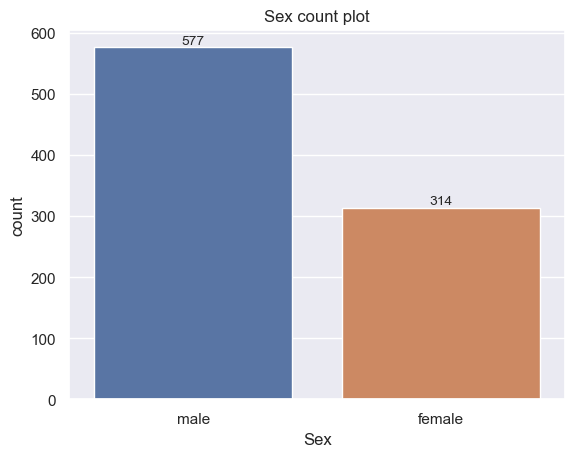

In [166]:

sns.countplot(data=df, x = 'Sex')
ax = plt.gca()
plt.title("Sex count plot")
add_bar_labels(ax)
plt.show()

In [167]:
print(f"During that particular ride, they sold {df['Ticket'].nunique()} of tickets.")

print("From this we get to know that,")
n = df['Name'].nunique() - df['Ticket'].nunique()
print(f"During that particular ride, there were {n} non-passengers or staff members present on the ship.")

During that particular ride, they sold 681 of tickets.
From this we get to know that,
During that particular ride, there were 210 non-passengers or staff members present on the ship.


In [168]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

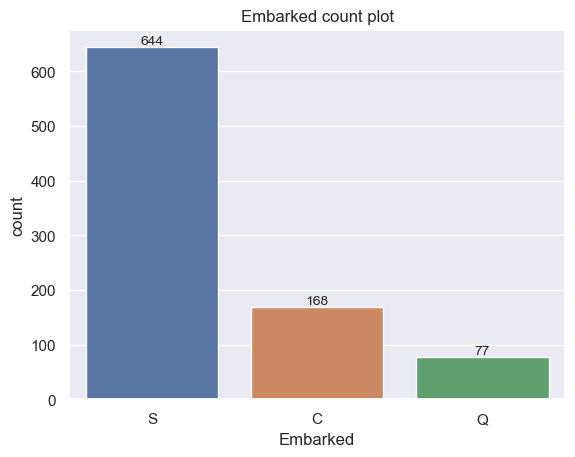

In [169]:
sns.countplot(data=df, x = 'Embarked')
ax = plt.gca()
plt.title("Embarked count plot")
add_bar_labels(ax)
plt.show()

In [170]:
int_col

['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [171]:
df['Survived'].unique()
# 0-> dead
# 1 -> Alive

array([0, 1], dtype=int64)

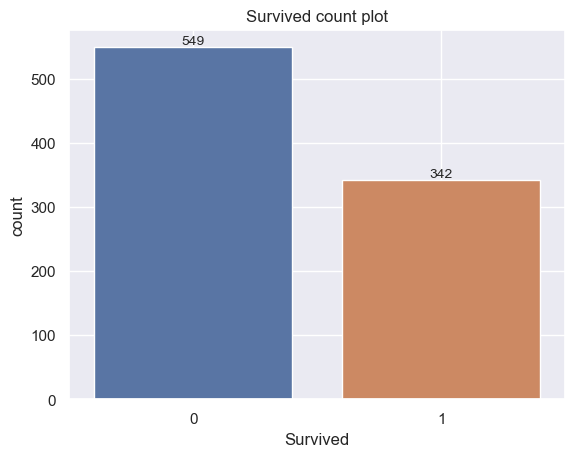

In [172]:
sns.countplot(data=df, x = 'Survived')
ax = plt.gca()
plt.title("Survived count plot")
add_bar_labels(ax)
plt.grid(True)
plt.show()

In [173]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

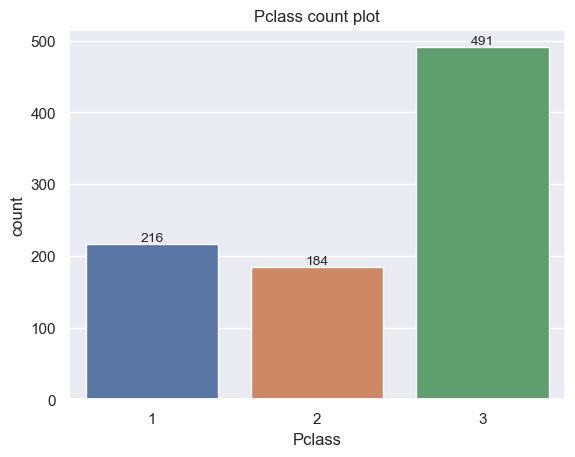

In [174]:
sns.countplot(data=df, x = 'Pclass')
ax = plt.gca()
plt.title("Pclass count plot")
add_bar_labels(ax)
plt.show()

In [175]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

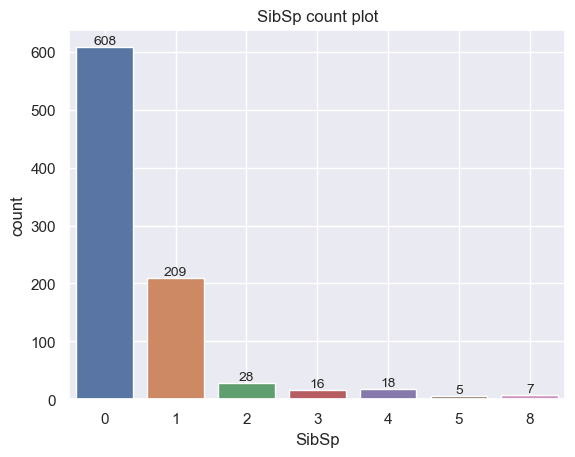

In [176]:

sns.countplot(data=df, x = 'SibSp')
ax = plt.gca()
plt.title("SibSp count plot")
add_bar_labels(ax)
plt.grid(True)
plt.show()

In [177]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

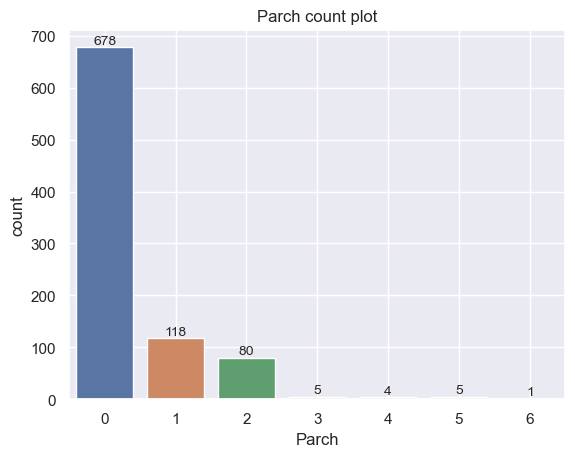

In [178]:
sns.countplot(data=df, x = 'Parch')
ax = plt.gca()
plt.title("Parch count plot")
add_bar_labels(ax)
plt.grid(True)
plt.show()

In [179]:
flt_col

['Age', 'Fare']

In [180]:
df['Age'].nunique()

88

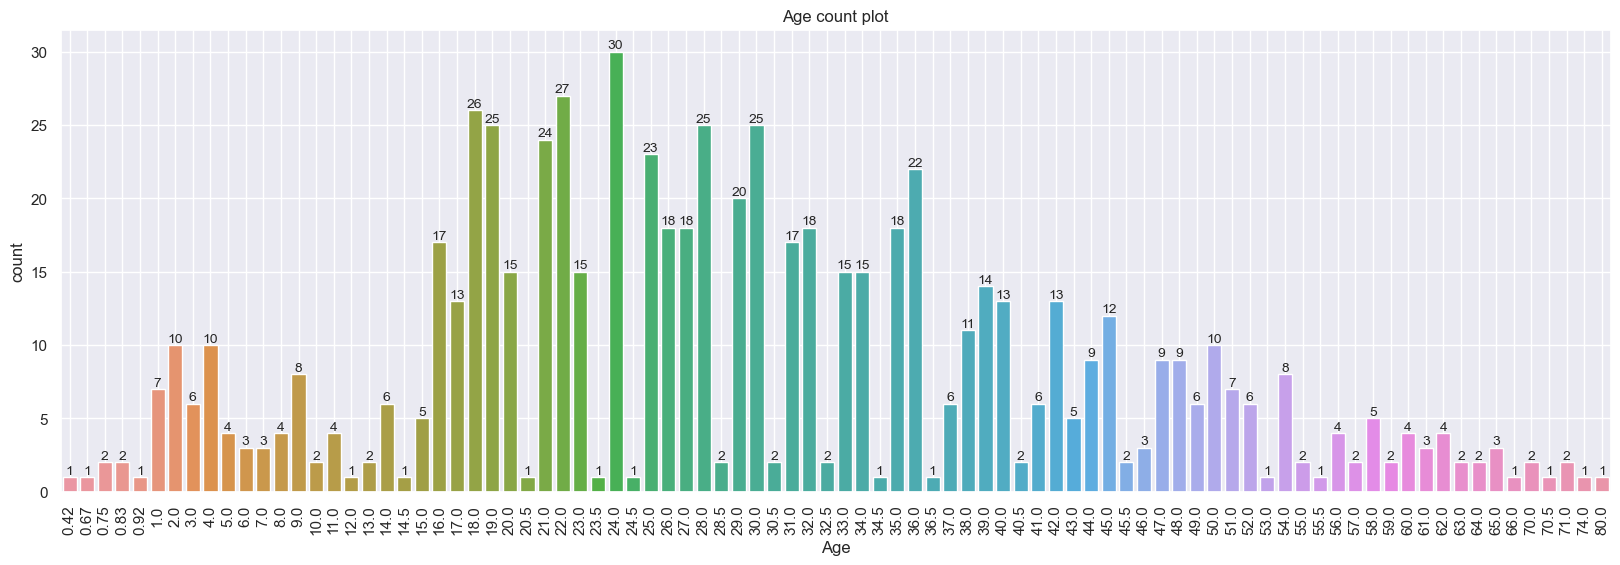

In [181]:
plt.figure(figsize=(20,6))
sns.set_theme(style='darkgrid')
sns.countplot(data=df, x = 'Age')
ax = plt.gca()
plt.title("Age count plot")
add_bar_labels(ax)
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

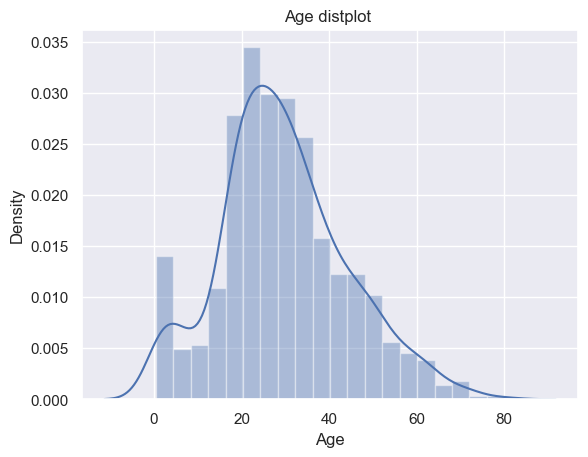

In [182]:
sns.distplot(df['Age'])

plt.title("Age distplot ")
plt.show()

<Axes: xlabel='SibSp', ylabel='Survived'>

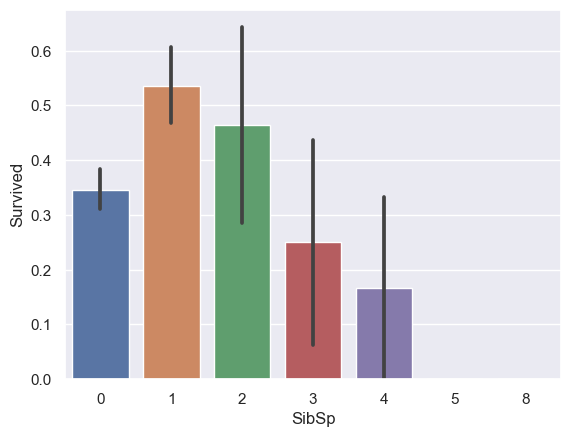

In [183]:
sns.barplot(data=df, x='SibSp', y='Survived')

In [184]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: xlabel='Sex', ylabel='Survived'>

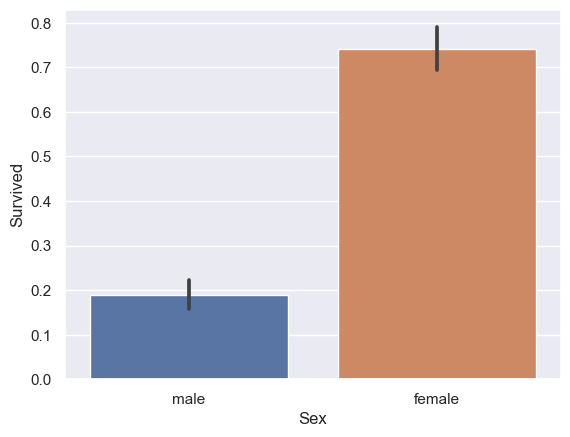

In [185]:
sns.barplot(data=df, x = 'Sex', y = 'Survived')

In [186]:
df[["Sex","Survived"]].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


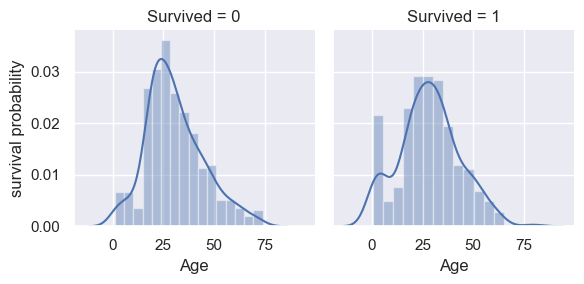

In [187]:
age_visual = sns.FacetGrid(df, col = 'Survived')
age_visual = age_visual.map(sns.distplot, "Age")
age_visual = age_visual.set_ylabels("survival probability")

<Axes: xlabel='Parch', ylabel='Survived'>

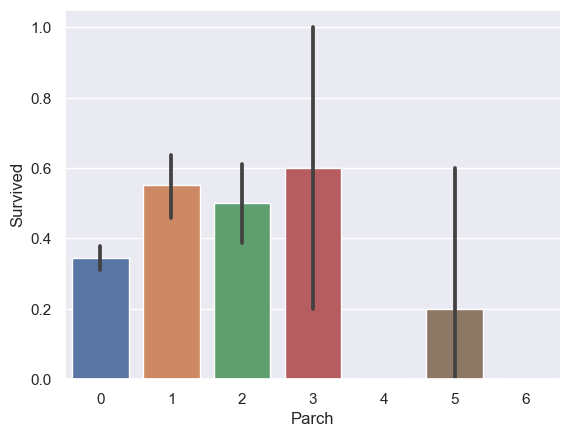

In [188]:
sns.barplot(data=df, x = 'Parch', y = 'Survived')

<Axes: xlabel='Pclass', ylabel='Survived'>

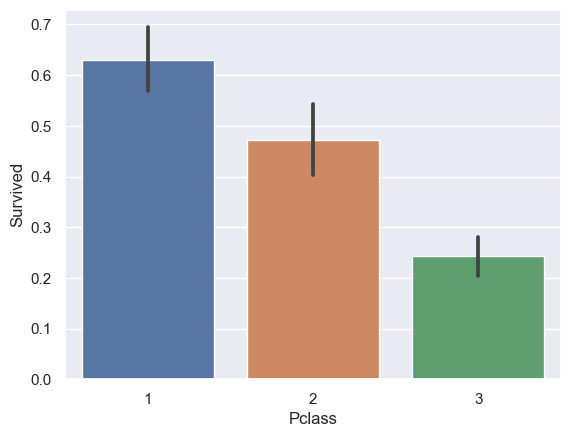

In [189]:
sns.barplot(data=df, x = 'Pclass', y = 'Survived')

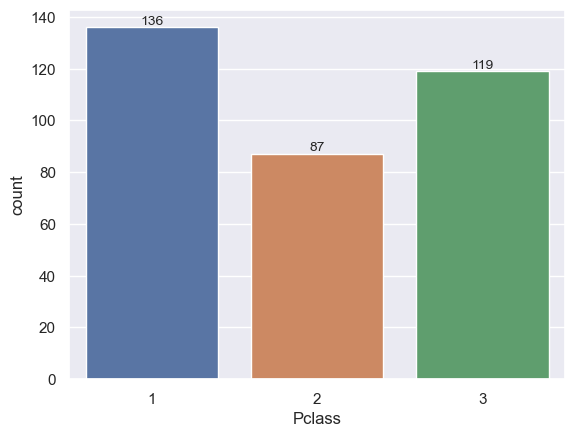

In [190]:
sns.countplot(data = df[df['Survived']==1], x = 'Pclass')
ax = plt.gca()
add_bar_labels(ax)

In [191]:
Class = df['Pclass'].unique()

for i in Class:
    count = len(df[df['Pclass']==i])
    c = len(df[(df['Pclass'] == i) & (df['Survived'] == 1)])
    
    ratio = (c/count)*100
            
    print(f"Class {i} : Survived Percentage :- {ratio:.2f} %")       

Class 3 : Survived Percentage :- 24.24 %
Class 1 : Survived Percentage :- 62.96 %
Class 2 : Survived Percentage :- 47.28 %


In [192]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

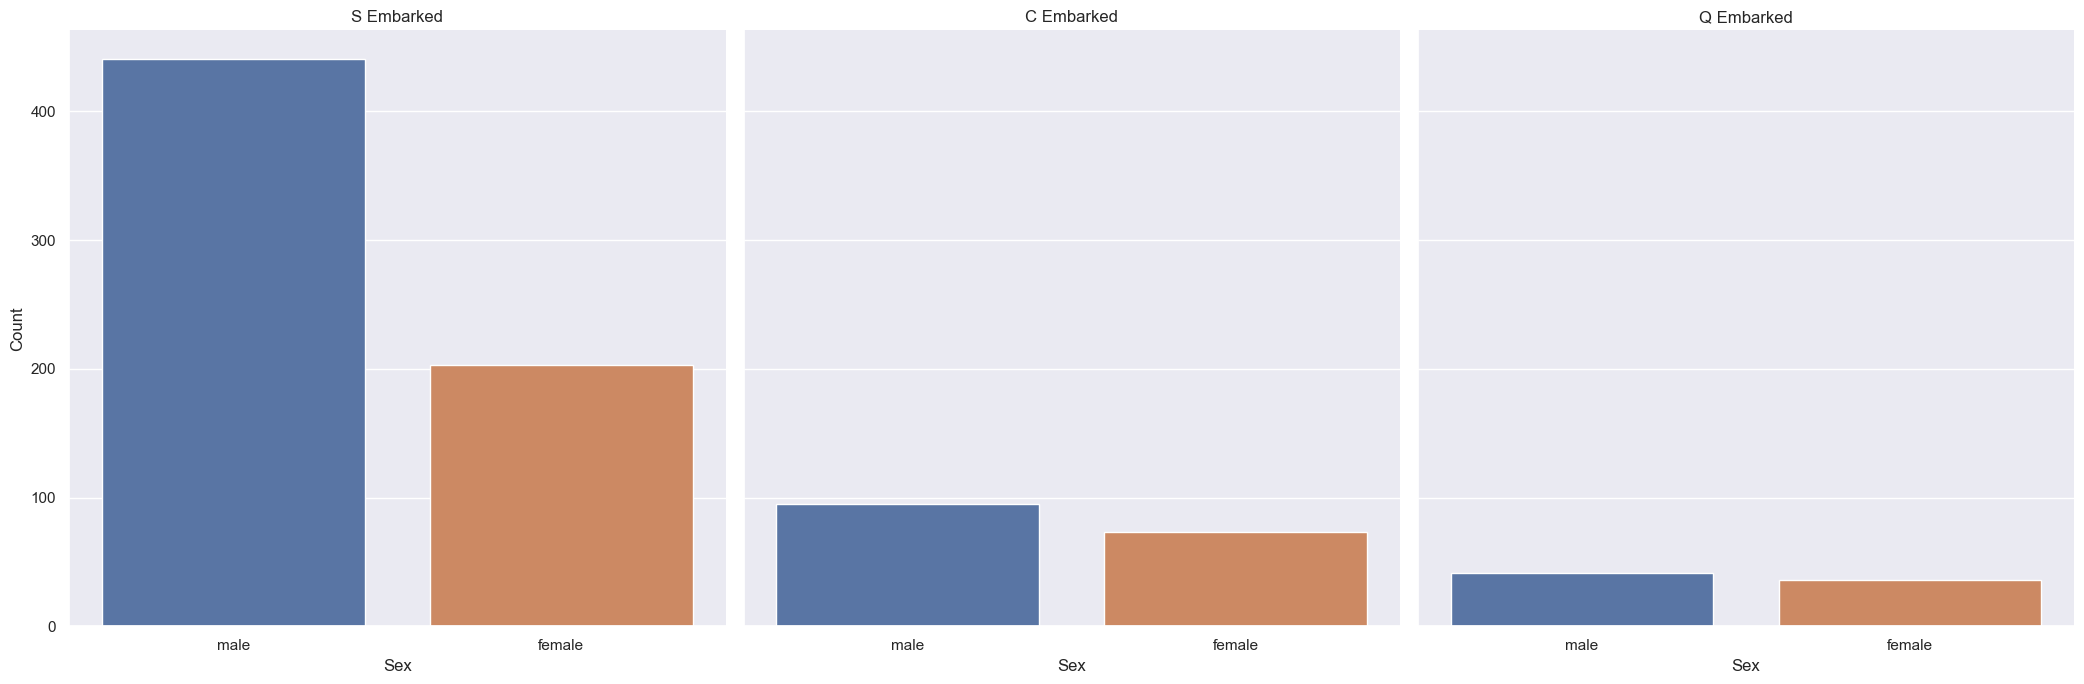

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using catplot (formerly factorplot) with kind="count" to replicate factorplot behavior
g = sns.catplot(x="Sex", col="Embarked", data=df, kind="count", height=7)

# Adjusting the labels
g.set_axis_labels("Sex", "Count")
g.set_titles("{col_name} Embarked")
plt.show()


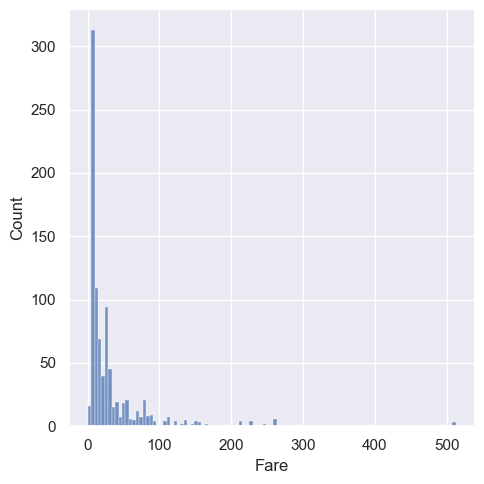

In [206]:
sns.displot(df['Fare'])

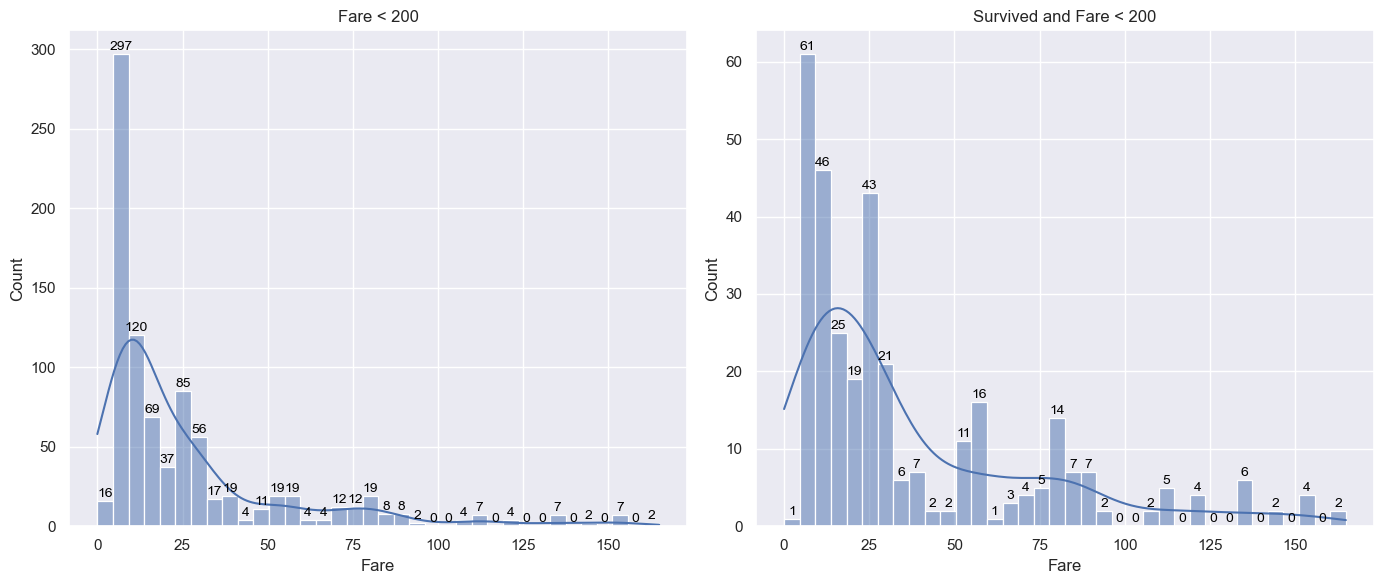

In [227]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot the first distribution
sns.histplot(df[df['Fare'] < 200]['Fare'], kde=True, ax=axs[0])
axs[0].set_title('Fare < 200')
add_bar_labels(axs[0])

# Plot the second distribution
sns.histplot(df[(df['Fare'] < 200) & (df['Survived'] == 1)]['Fare'], kde=True, bins=36, ax=axs[1])
axs[1].set_title('Survived and Fare < 200')
add_bar_labels(axs[1])

# Adjust layout
plt.tight_layout()
plt.show()


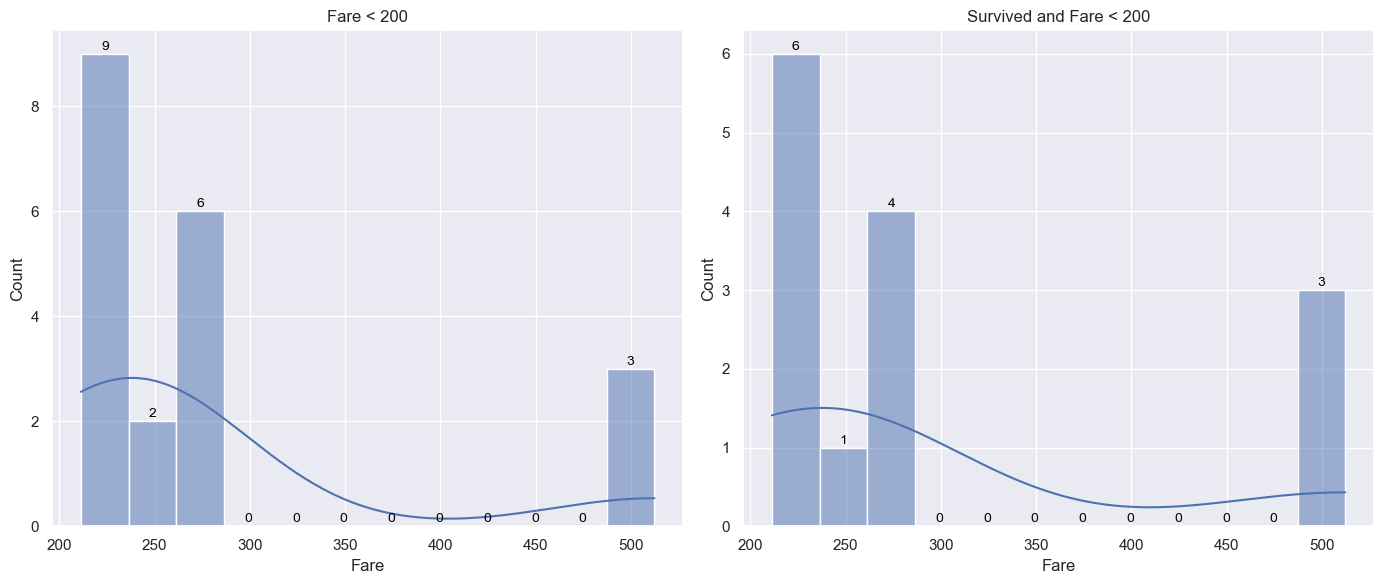

In [231]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot the first distribution
sns.histplot(df[(df['Fare'] > 200) & (df['Fare'] < 600)]['Fare'], kde=True, ax=axs[0])

axs[0].set_title('Fare < 200')
add_bar_labels(axs[0])

# Plot the second distribution
sns.histplot(df[(df['Fare'] > 200)& (df['Fare'] < 600)& (df['Survived'] == 1)]['Fare'], kde=True, bins=12, ax=axs[1])
axs[1].set_title('Survived and Fare < 200')
add_bar_labels(axs[1])

# Adjust layout
plt.tight_layout()
plt.show()


In [233]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [234]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [237]:
df['Embarked'] = df['Embarked'].fillna('S')

In [239]:
del df['Cabin']

In [240]:
mean = df["Age"].mean()
std = df["Age"].std()
is_null = df["Age"].isnull().sum()
    
# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
# fill NaN values in Age column with random values generated
age_slice = df["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
# data["Age"] = age_slice

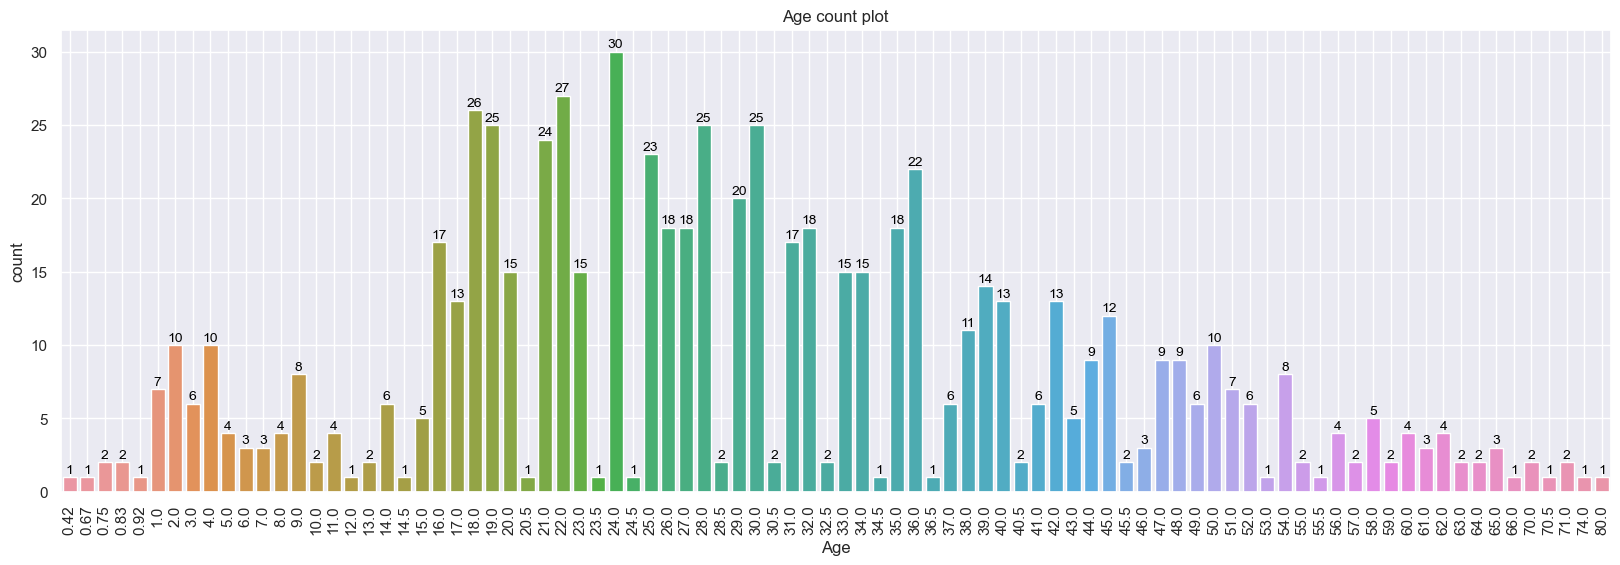

In [245]:

plt.figure(figsize=(20,6))
sns.set_theme(style='darkgrid')
sns.countplot(data=df, x = 'Age')
ax = plt.gca()
plt.title("Age count plot")
add_bar_labels(ax)
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

In [246]:
mean = df['Age'].mean()
print("Mean :- ",mean)
std = df['Age'].std()
print("STD :- ",std)
is_null = df['Age'].isnull().sum()

np.random.randint(mean - std, mean + std, size = is_null)
age_slice = df['Age'].copy()
age_slice[np.isnan(age_slice)] = rand_age
df['Age'] = age_slice

Mean :-  29.69911764705882
STD :-  14.526497332334044


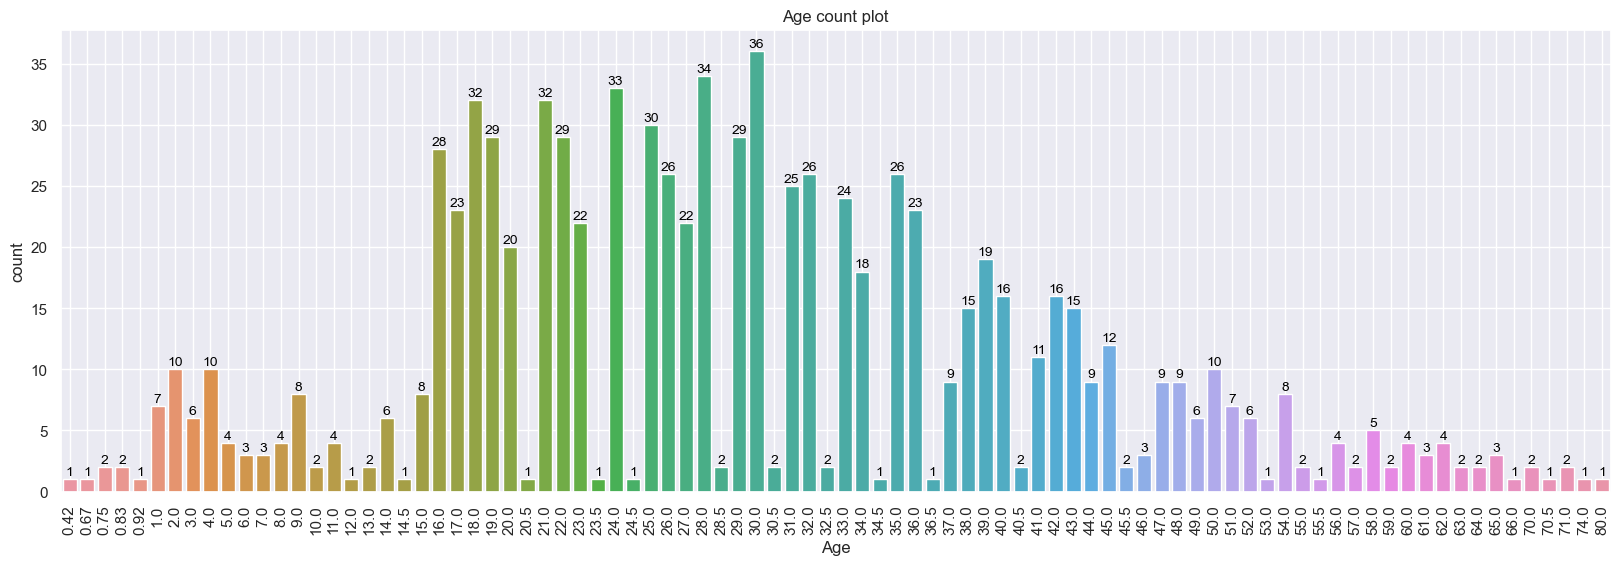

In [247]:
plt.figure(figsize=(20,6))
sns.set_theme(style='darkgrid')
sns.countplot(data=df, x = 'Age')
ax = plt.gca()
plt.title("Age count plot")
add_bar_labels(ax)
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

In [250]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [252]:
obj_col

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [257]:
print(df['Sex'].unique())
print(df['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [258]:
del df['Name']
del df['Ticket']

In [261]:
df['Sex'] = df['Sex'].replace({'male':1, 'female':0})
df['Embarked'] = df['Embarked'].replace({'S' : 1 , 'C' : 2 , 'Q' : 3})

In [263]:
print(df['Sex'].unique())
print(df['Embarked'].unique())

[1 0]
[1 2 3]


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [266]:
del df['PassengerId']

<Axes: >

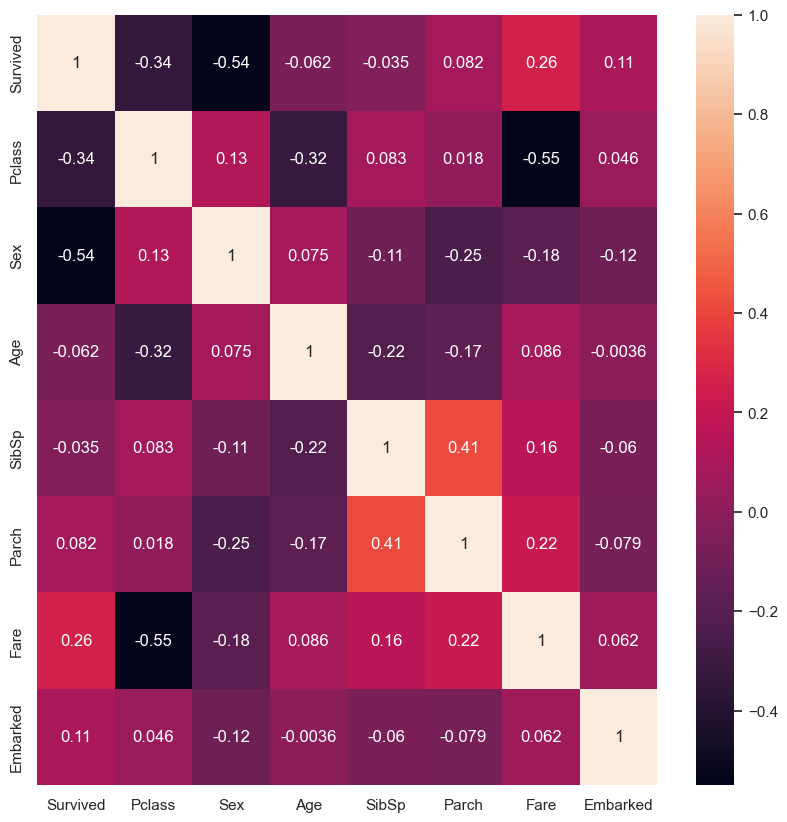

In [269]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot=True)

In [273]:
X = df.iloc[:,1:] 
Y = df['Survived']

In [270]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [274]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [275]:
print("Input train shape   :-",X_Train.shape)
print("Output train shape :-",X_Test.shape)
print("Input test shape     :-",Y_Train.shape)
print("Output test shape   :-",Y_Test.shape)

Input train shape   :- (623, 7)
Output train shape :- (268, 7)
Input test shape     :- (623,)
Output test shape   :- (268,)


In [295]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# function to get best random search attributes

def get_best_randomSearch_result(model):
    #print("Best estimator : ", model.best_estimator_)
    print("Best set of Parameter", model.best_params_)

In [277]:
from sklearn.linear_model import LogisticRegression
parameter = {'max_iter':[100,200,300,500]}
LR_Model = LogisticRegression()
LR_Model_Rs = RandomizedSearchCV(LR_Model, param_distributions=parameter, cv = 5, random_state=42)
LR_Model_Rs.fit(X_Train, Y_Train)

Pred_LR = LR_Model_Rs.predict(X_Test)

In [278]:
LR_Accuracy = accuracy_score(y_true=Y_Test, y_pred=Pred_LR)
print("Accuracy using Logistic Regression :- ",LR_Accuracy)

Accuracy using Logistic Regression :-  0.8022388059701493


In [280]:
cm = confusion_matrix(Y_Test.values, Pred_LR)
print(cm)

[[135  22]
 [ 31  80]]


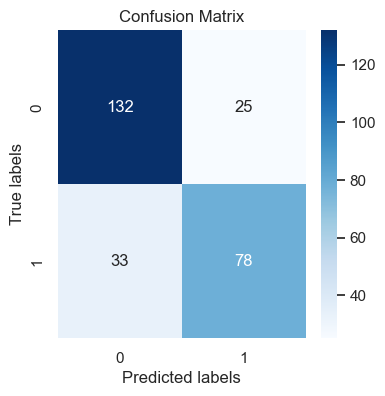

In [319]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [284]:
get_best_randomSearch_result(LR_Model_Rs)

Best estimator :  LogisticRegression()
Best set of Parameter {'max_iter': 100}


In [286]:
from sklearn.svm import SVC

parameters = {'kernel':['linear', 'rbf','poly','sigmoid'], 'C':[100,50]}

LR_SVM = SVC()
LR_SVM_RS = RandomizedSearchCV(LR_SVM, param_distributions=parameters, cv = 5, random_state=42)
LR_SVM_RS.fit(X_Train, Y_Train)

Y_PRED_SVM = LR_SVM_RS.predict(X_Test)

In [289]:
SVM_Accuracy = accuracy_score(y_true=Y_Test, y_pred=Y_PRED_SVM)
print("Accuracy using upport Vector Machine :- ",SVM_Accuracy)

Accuracy using upport Vector Machine :-  0.7835820895522388


In [292]:
cm2 = confusion_matrix(Y_Test.values, Y_PRED_SVM)
print(cm)

[[132  25]
 [ 33  78]]


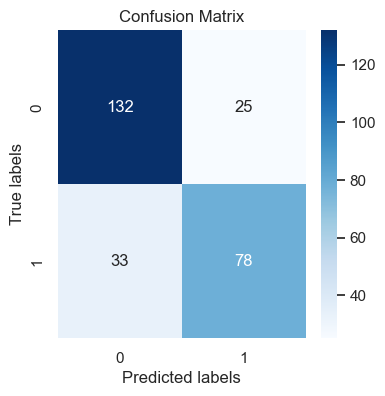

In [318]:
plt.figure(figsize=(4,4))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [298]:
from sklearn.tree import DecisionTreeClassifier

parameter = {'max_depth':np.arange(2,11,2)}

DT_Model = DecisionTreeClassifier()
DT_Model_RS = RandomizedSearchCV(DT_Model, param_distributions=parameter, cv =5, random_state=42)
DT_Model_RS.fit(X_Train, Y_Train)
DT_Predict = DT_Model_RS.predict(X_Test)

In [300]:
DT_Accuracy = accuracy_score(y_true=Y_Test,y_pred=DT_Predict)
print("Accuracy of model using SVM :- ",DT_Accuracy)

Accuracy of model using SVM :-  0.7985074626865671


In [302]:
cm3 = confusion_matrix(Y_Test.values, DT_Predict)
print(cm3)

[[135  22]
 [ 32  79]]


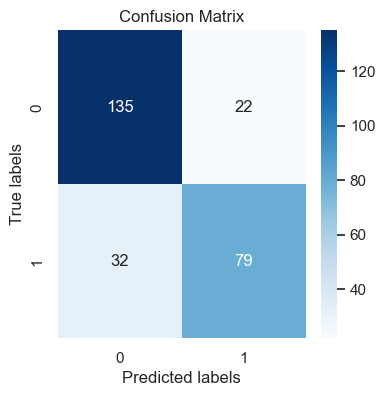

In [307]:
plt.figure(figsize=(4,4))

sns.heatmap(cm3,annot=True, fmt = "d",cmap = 'Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [311]:
from sklearn.ensemble import RandomForestClassifier
parameter = {'n_estimators':np.arange(20,101,10), 'max_depth':np.arange(2,11,2)}

RF_Model = RandomForestClassifier()
RF_Model_RS = RandomizedSearchCV(RF_Model, param_distributions=parameter, cv = 5, random_state=42)
RF_Model_RS.fit(X_Train, Y_Train)
RF_Predict = RF_Model_RS.predict(X_Test)

In [312]:
RF_Accuracy = accuracy_score(y_true=Y_Test, y_pred=RF_Predict)
RF_Accuracy

0.8134328358208955

In [314]:
cm4 = confusion_matrix(y_true=Y_Test, y_pred=RF_Predict)
print(cm4)

[[142  15]
 [ 35  76]]


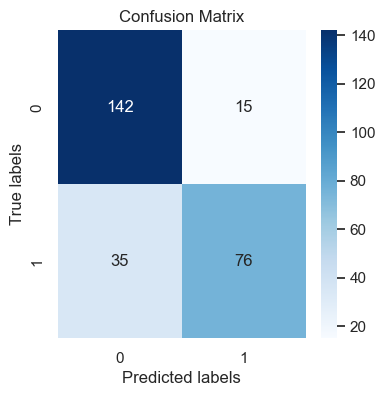

In [315]:
plt.figure(figsize=(4,4))

sns.heatmap(cm4,annot=True, fmt = "d",cmap = 'Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [316]:
print("Accuracy using Logistic Regression :- ",LR_Accuracy)
print("Accuracy using support Vector Machine :- ",SVM_Accuracy)
print("Accuracy of model using Decision Tree :- ",DT_Accuracy)
print("Accuracy of model using Random Forest",RF_Accuracy)

Accuracy using Logistic Regression :-  0.8022388059701493
Accuracy using support Vector Machine :-  0.7835820895522388
Accuracy of model using Decision Tree :-  0.7985074626865671
Accuracy of model using Random Forest 0.8134328358208955


In [317]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,1
1,1,0,38.0,1,0,71.2833,2
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,1
887,1,0,19.0,0,0,30.0000,1
888,3,0,31.0,1,2,23.4500,1
889,1,1,26.0,0,0,30.0000,2
